In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot')

In [30]:
df = pd.read_csv("../static/疫情关键词实时舆论.csv", encoding="utf-8")
df.head()

,name,time,f,content,spiderTime
0,人民网,04月02日 16:00,微博 weibo.com,#平凡英雄#,2022-04-03
1,科罗廖夫,今天18:15,微博视频号,国家统计局许宪春副局长：疫情期间共克时艰，低收入人群想提高收入办法有很多，比如，把闲置的房子...,2022-04-03
2,胜利主义章北海,今天18:21,NaN,#上海184小时建造沪上最大方舱#,2022-04-03
3,醋加五勺,10秒前,iPhone客户端,小猪咪们在新家适应的很快！已经可以看到她们经常客厅房间的跑酷，老母亲老父亲露出欣慰的笑容,2022-04-03
4,YoloHuxx,18秒前,iPhone客户端,今年生日愿望,2022-04-03


In [33]:
f = [str(i) if "iPhone" not in str(i) else "iPhone客户端" for i in df['f'].values.tolist()]
df['f'] = f

In [36]:
new_df = df.groupby("f").count().sort_values("name",ascending=False)
new_df.reset_index(inplace=True)
new_df = new_df[['f',"name"]]
new_df.columns=['来源','次数']

In [37]:
r_df = new_df[:20]

In [38]:
r_df

,来源,次数
0,iPhone客户端,969
1,微博视频号,276
2,微博 weibo.com,238
3,nan,161
4,新版微博 weibo.com,99
5,微博国际版,46
6,Android,35
7,HUAWEI Mate 40 Pro,35
8,360安全浏览器,28
9,HarmonyOS设备,28


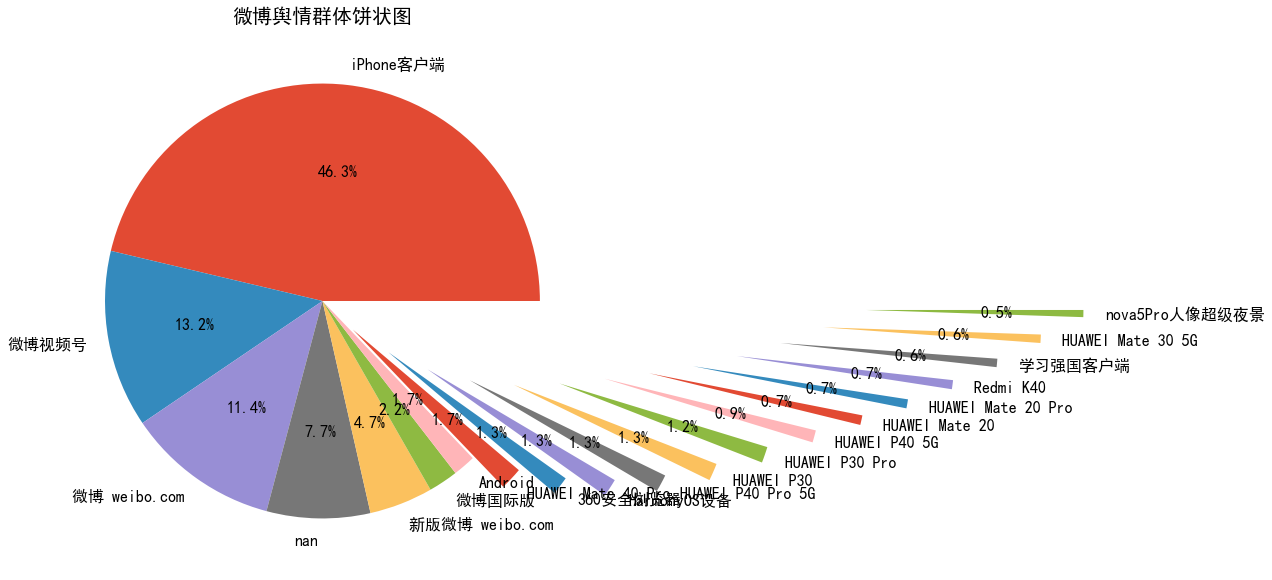

In [39]:
import numpy as np
# np.hstack():在水平方向上拼接数组
explode =np.hstack((np.zeros(6),np.linspace(0,2.5,len(r_df)-6))) # (每一块)离开中心距离
plt.figure(figsize=(15, 10))
plt.title("微博舆情群体饼状图",fontsize = 20)
plt.pie(r_df['次数'],labels=r_df['来源'],autopct='%1.1f%%',textprops={'fontsize':16},explode=explode);